<a href="https://colab.research.google.com/github/bharathdev329/bharathdev329-Unsupervised-casre-study/blob/main/Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
d=load_wine()
df=pd.DataFrame(load_wine().data,columns=load_wine().feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [1]:
df.info()

NameError: name 'df' is not defined

In [ ]:
df.isna().sum()
#

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


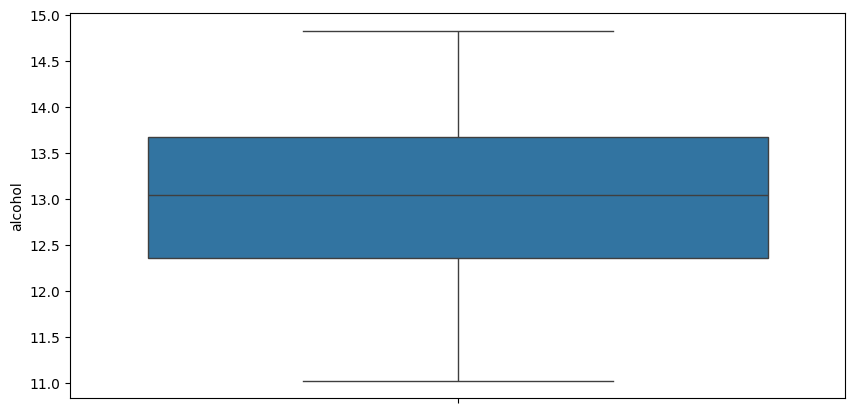

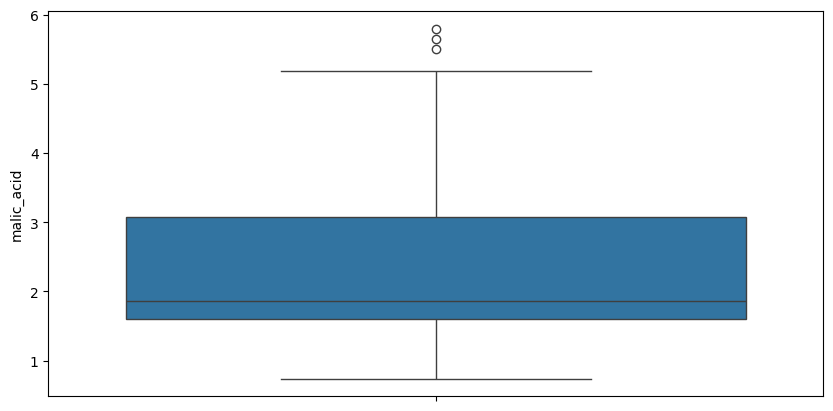

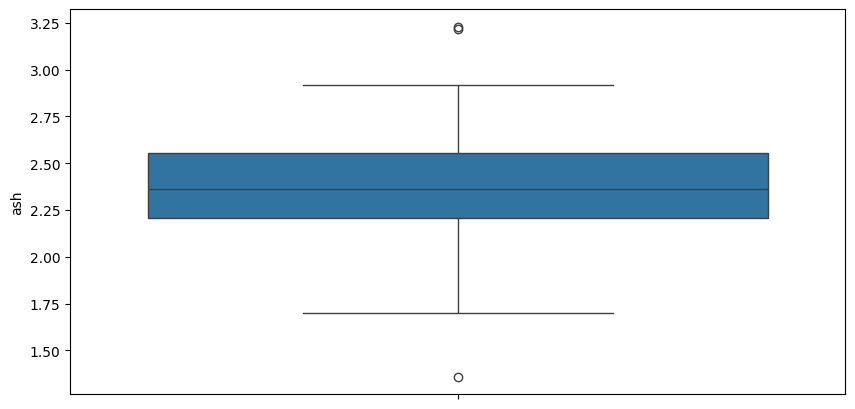

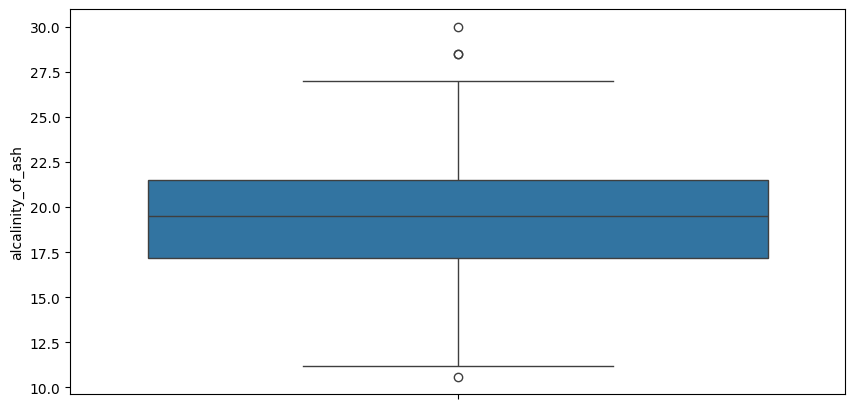

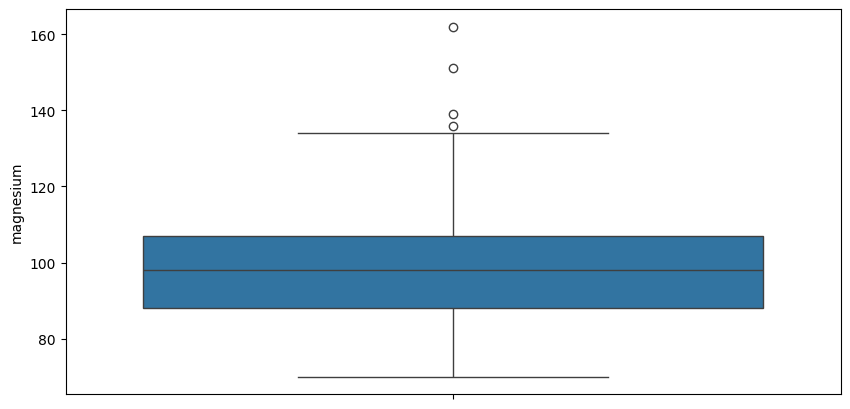

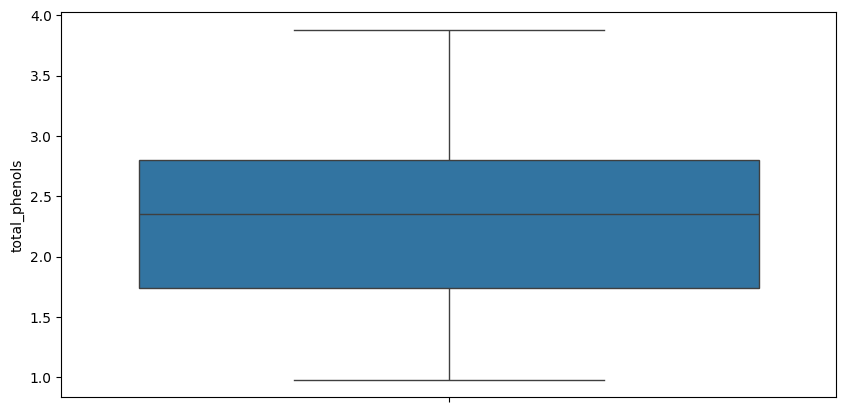

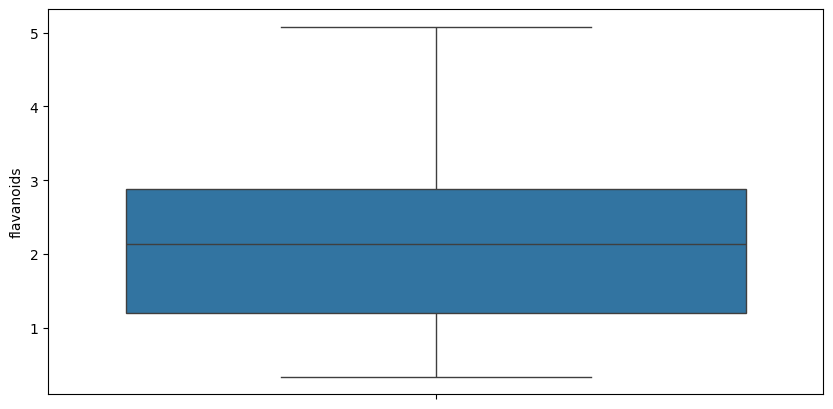

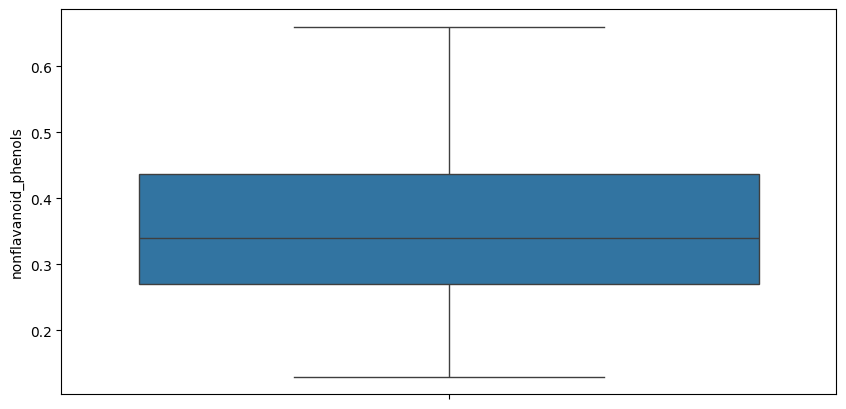

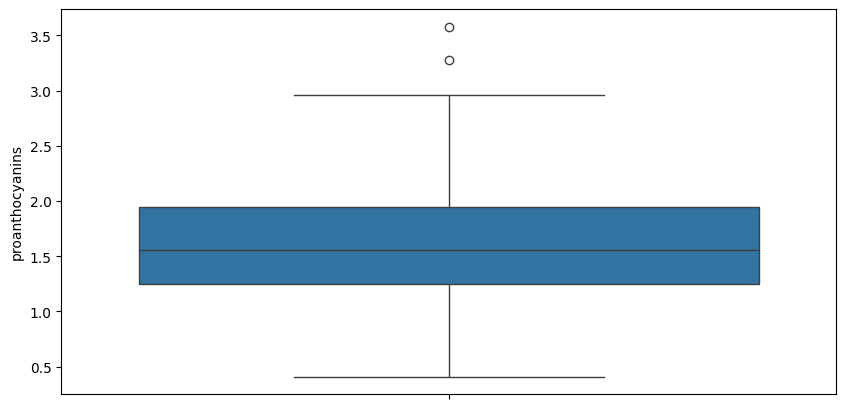

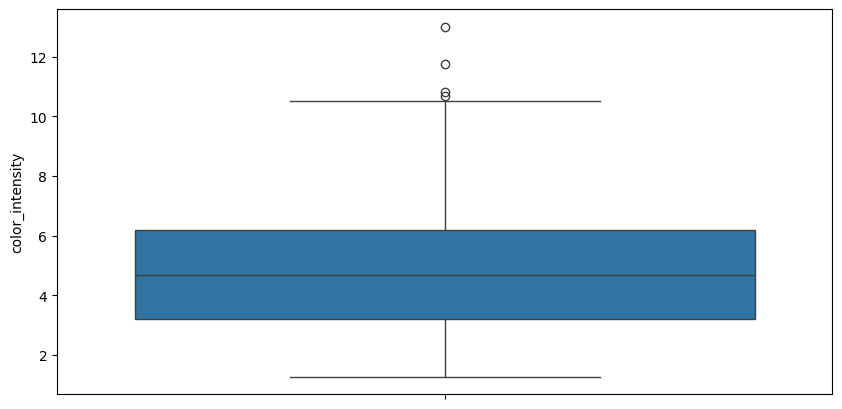

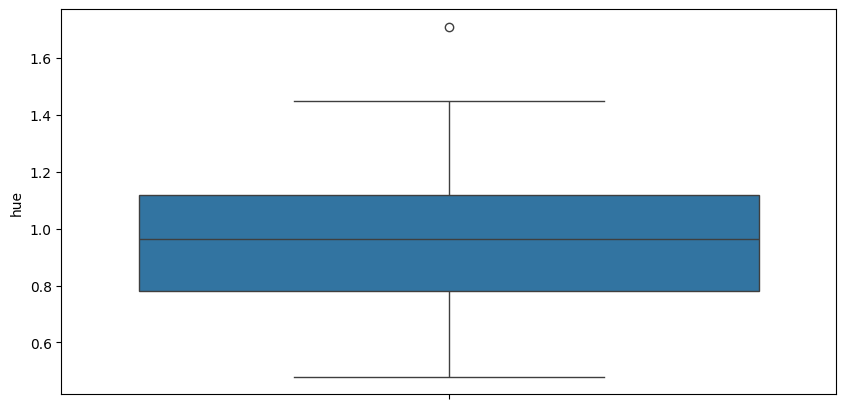

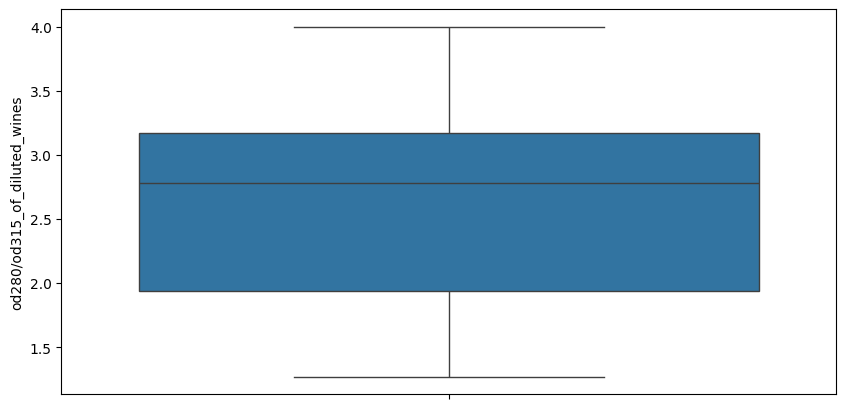

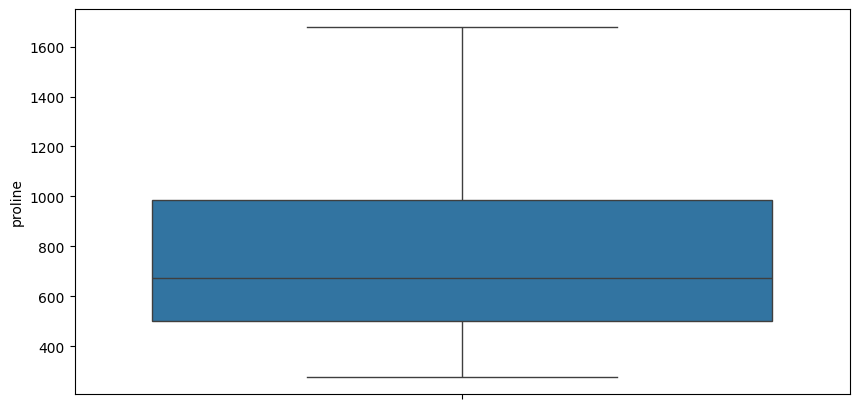

In [ ]:
for col in df.select_dtypes(include='float64'):
  plt.figure(figsize=(10,5))
  sns.boxplot(df[col])
  plt.show()

In [ ]:
outlier_col=[]
for column in df.select_dtypes(include=['float64']):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"Number of outliers in {column}: {len(outliers)}")
    count=outliers.shape[0]

    if count>0:
        outlier_col.append(column)
print(outlier_col)

Number of outliers in alcohol: 0
Number of outliers in malic_acid: 3
Number of outliers in ash: 3
Number of outliers in alcalinity_of_ash: 4
Number of outliers in magnesium: 4
Number of outliers in total_phenols: 0
Number of outliers in flavanoids: 0
Number of outliers in nonflavanoid_phenols: 0
Number of outliers in proanthocyanins: 2
Number of outliers in color_intensity: 4
Number of outliers in hue: 1
Number of outliers in od280/od315_of_diluted_wines: 0
Number of outliers in proline: 0
['malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'proanthocyanins', 'color_intensity', 'hue']


In [ ]:

for column in outlier_col:
  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  df[column]=df[column].clip(lower=lower_bound,upper=upper_bound)

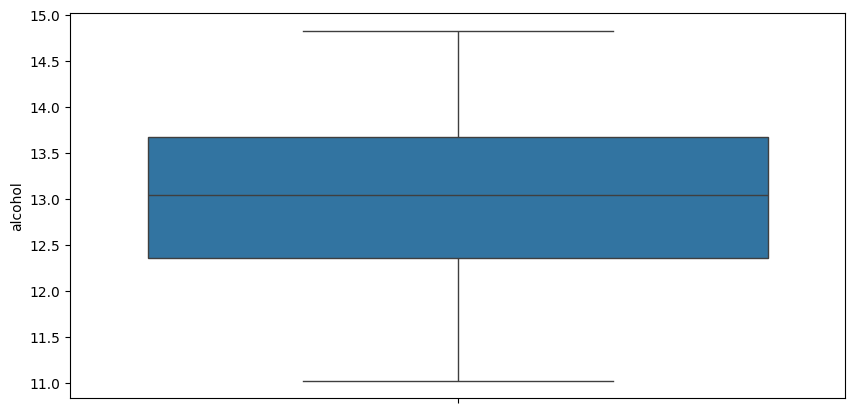

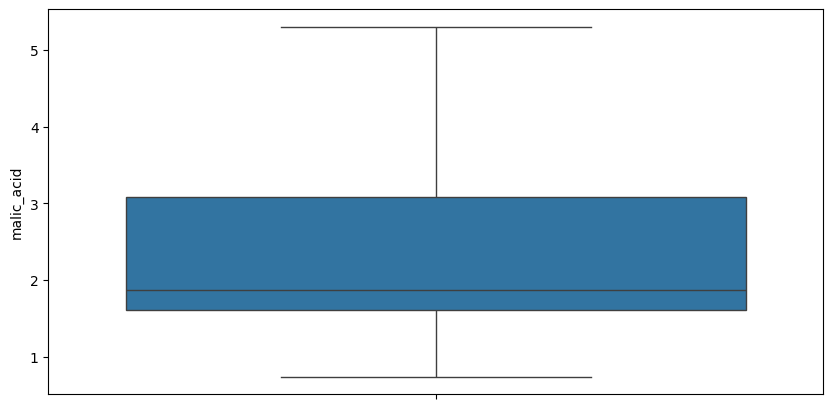

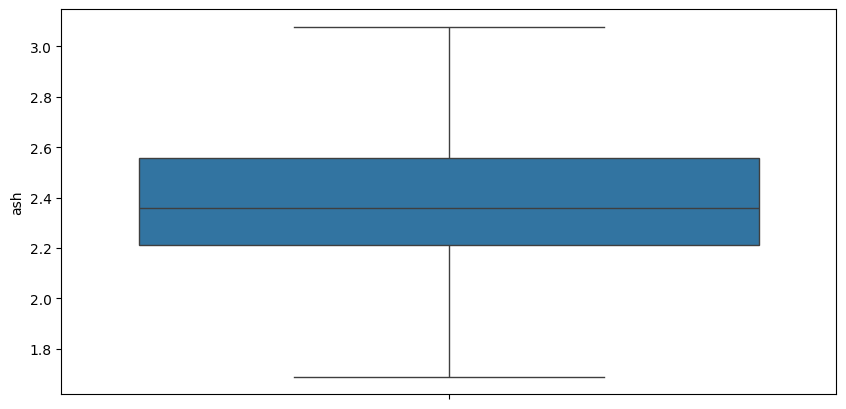

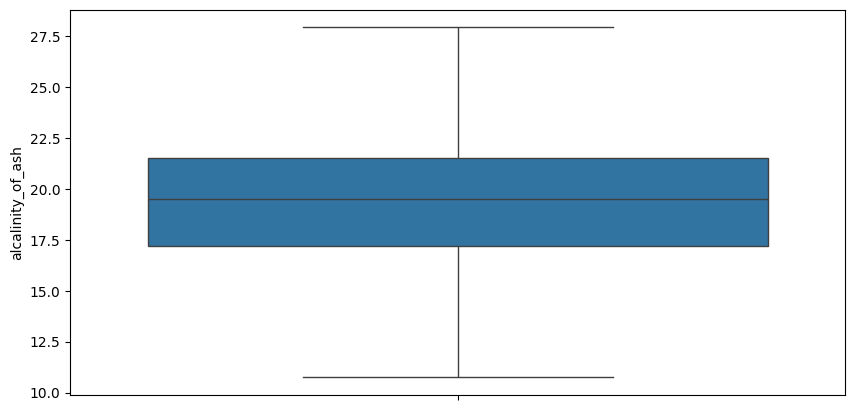

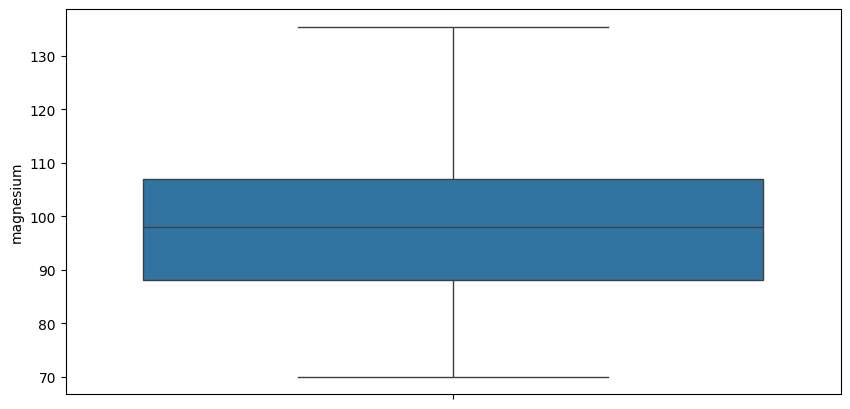

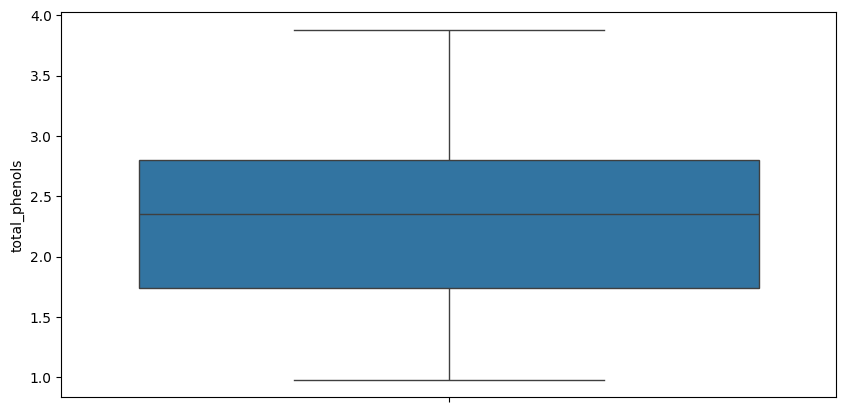

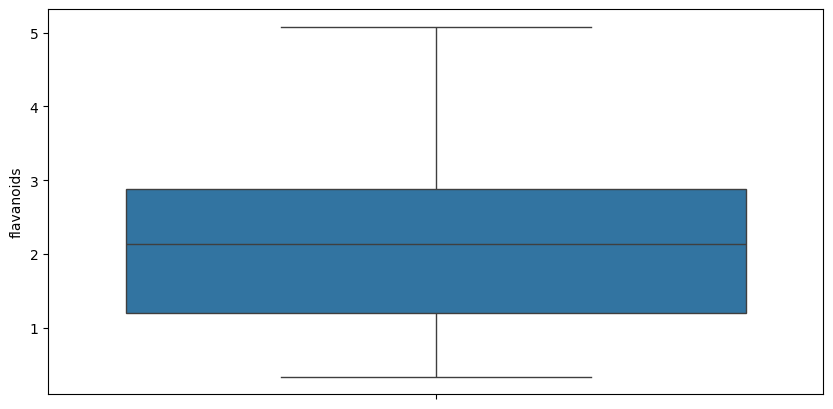

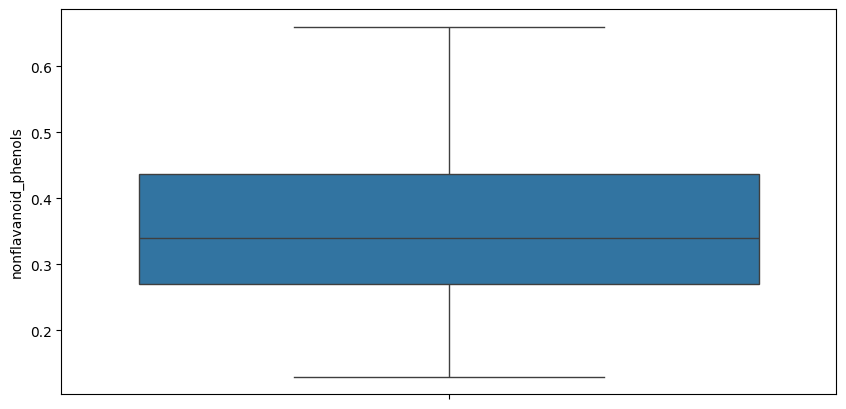

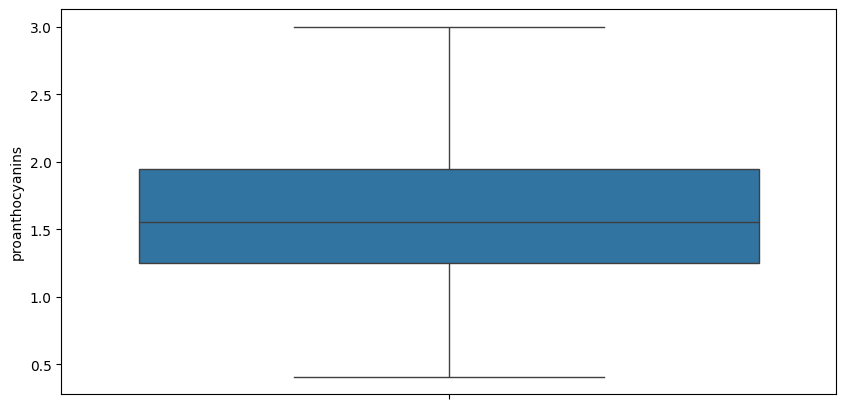

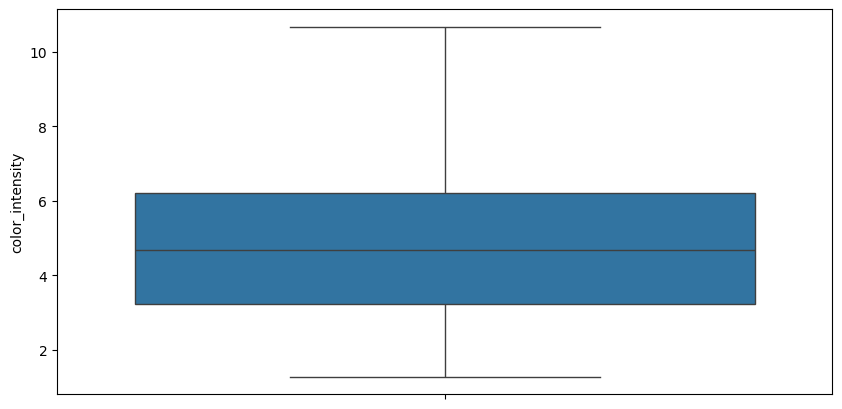

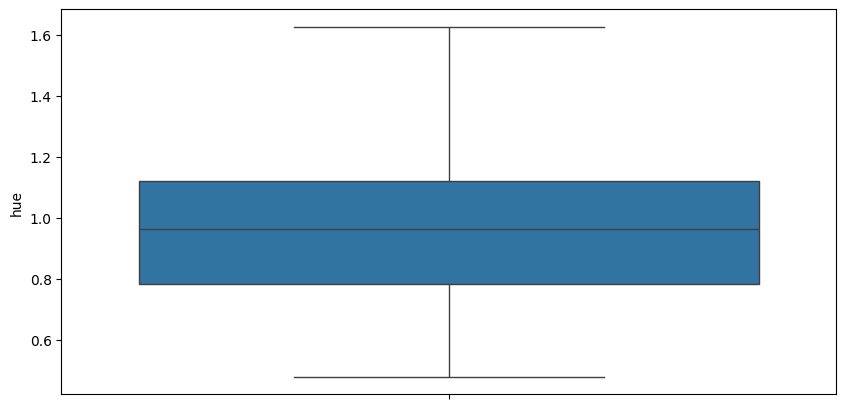

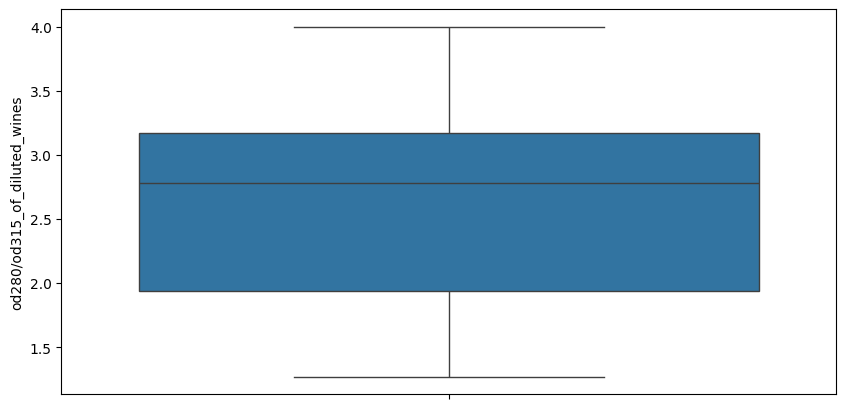

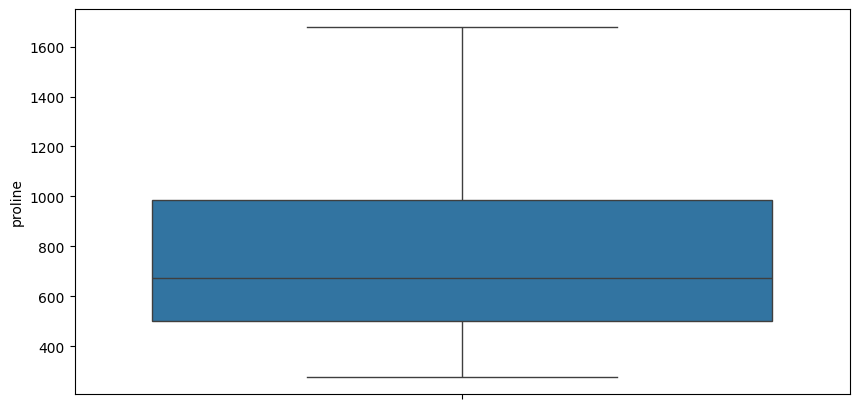

In [ ]:
for col in df.select_dtypes(include='float64'):
  plt.figure(figsize=(10,5))
  sns.boxplot(df[col])
  plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)
df_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874


In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(df_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [ ]:
pred_cluster=kmeans.predict(df_scaled)
pred_cluster

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

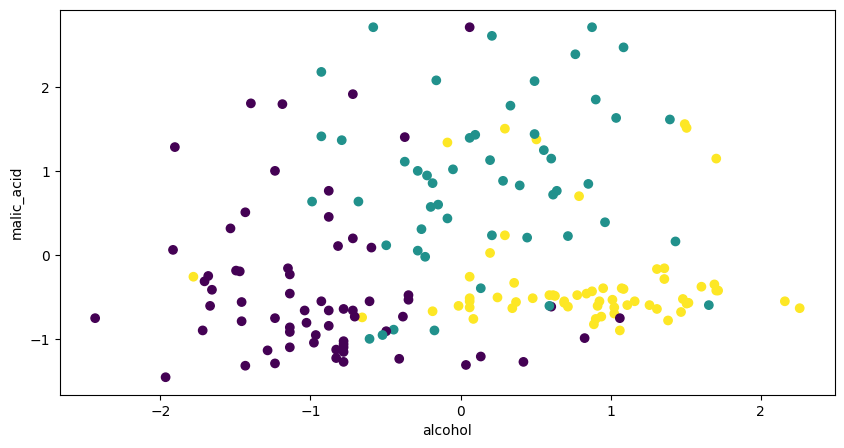

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df_scaled['alcohol'],df_scaled['malic_acid'],c=pred_cluster)
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.show()


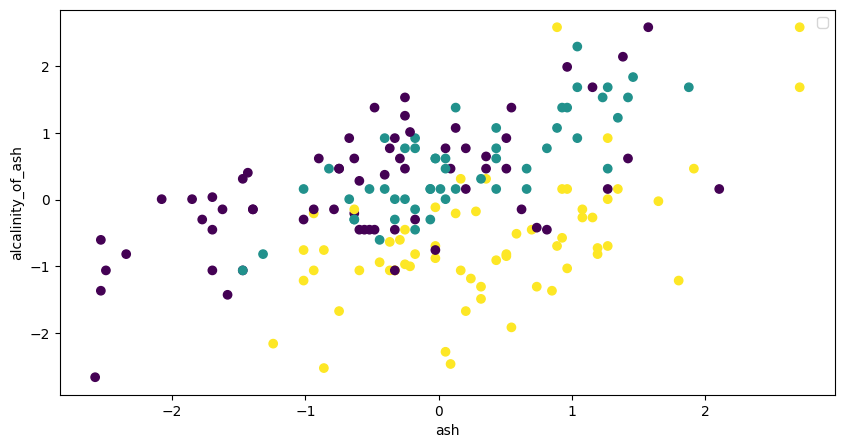

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df_scaled['ash'],df_scaled['alcalinity_of_ash'],c=pred_cluster)
plt.xlabel('ash')
plt.ylabel('alcalinity_of_ash')
plt.legend()
plt.show()


In [ ]:
#finding optimal cluster(K)

wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42,init="k-means++",max_iter=300,n_init=10)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)

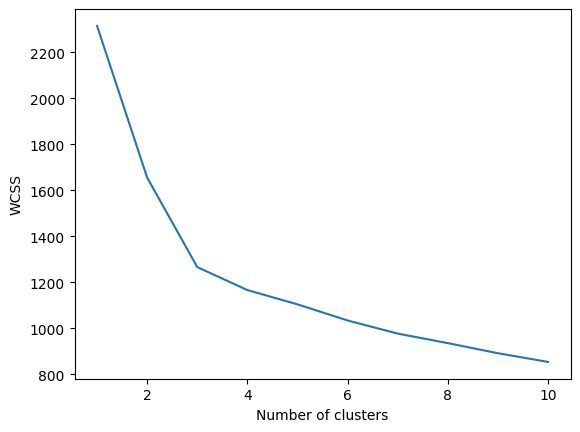

In [ ]:
#plotting elbow curve

plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Agglometrive Clustering

from sklearn.cluster import AgglomerativeClustering

agglo_cluster=AgglomerativeClustering(affinity='euclidean',linkage='ward')
y_agglo=agglo_cluster.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
y_agglo

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

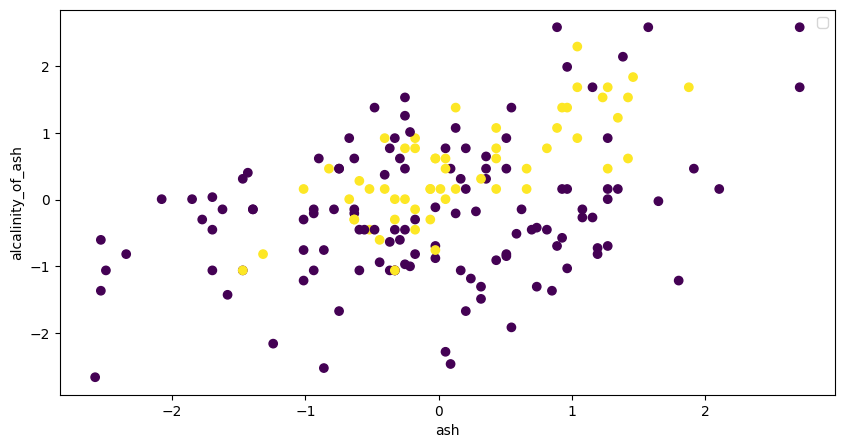

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df_scaled['ash'],df_scaled['alcalinity_of_ash'],c=y_agglo)
plt.xlabel('ash')
plt.ylabel('alcalinity_of_ash')
plt.legend()
plt.show()


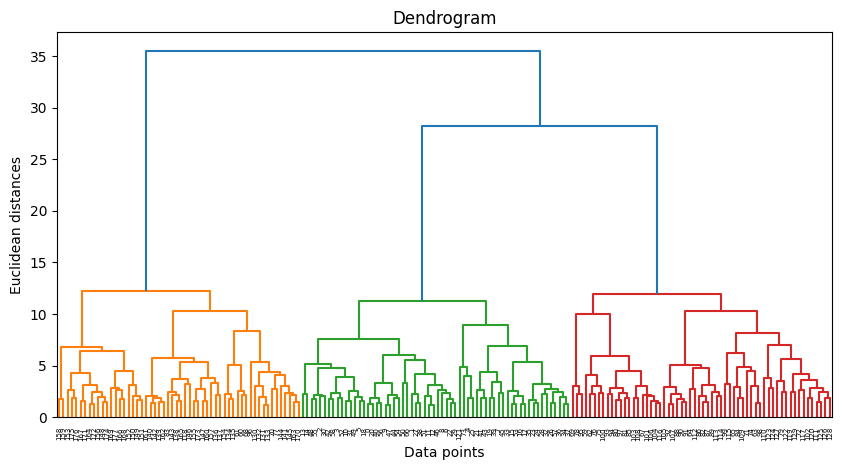

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage

z=linkage(df_scaled,'ward')

plt.figure(figsize=(10,5))
dendrogram(z)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')

plt.show()



In [ ]:
from sklearn.metrics import silhouette_score
help(silhouette_score)
#

Help on function silhouette_score in module sklearn.metrics.cluster._unsupervised:

silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)
    Compute the mean Silhouette Coefficient of all samples.
    
    The Silhouette Coefficient is calculated using the mean intra-cluster
    distance (``a``) and the mean nearest-cluster distance (``b``) for each
    sample.  The Silhouette Coefficient for a sample is ``(b - a) / max(a,
    b)``.  To clarify, ``b`` is the distance between a sample and the nearest
    cluster that the sample is not a part of.
    Note that Silhouette Coefficient is only defined if number of labels
    is ``2 <= n_labels <= n_samples - 1``.
    
    This function returns the mean Silhouette Coefficient over all samples.
    To obtain the values for each sample, use :func:`silhouette_samples`.
    
    The best value is 1 and the worst value is -1. Values near 0 indicate
    overlapping clusters. Negative values generally indi

In [ ]:
silhouette_score(df_scaled,y_agglo)

0.2676007843920244

In [ ]:
for i in range(2,11):
  agglo_cluster=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward')
  y_agglo=agglo_cluster.fit_predict(df_scaled)

  silh_score=silhouette_score(df_scaled,y_agglo)
  print(f"Silhouette score for {i} clusters: {score}" )

Silhouette score for 2 clusters: 0.13025366115797737
Silhouette score for 3 clusters: 0.13025366115797737
Silhouette score for 4 clusters: 0.13025366115797737
Silhouette score for 5 clusters: 0.13025366115797737
Silhouette score for 6 clusters: 0.13025366115797737
Silhouette score for 7 clusters: 0.13025366115797737
Silhouette score for 8 clusters: 0.13025366115797737
Silhouette score for 9 clusters: 0.13025366115797737
Silhouette score for 10 clusters: 0.13025366115797737


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

ValueError: x and y must have same first dimension, but have shapes (9,) and (1,)

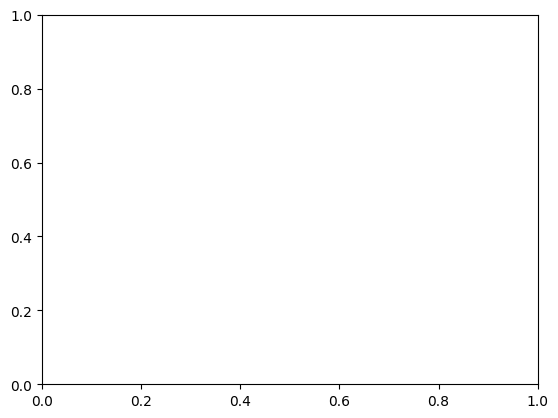

In [ ]:
plt.plot(range(2,11),silh_score,marker='o')